In [28]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [9]:
x = tf.placeholder(tf.float32, [None, 5]) #Training data
w = tf.Variable(tf.zeros([5,1])) #Weights(parameters)

y = tf.matmul(x, w) # X*w

t = tf.placeholder(tf.float32, [None ,1]) #Actual Value
loss = tf.reduce_sum(tf.square(y-t)) #Loss - Cost Function
train_step = tf.train.AdamOptimizer().minimize(loss) # AdamOptimzier ~= gradient descent


In [22]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [23]:
train_t = np.array([5.2, 5.7, 8.6, 14.9, 18.2, 20.4, 25.5, 26.4, 22.8, 17.5, 11.1, 6.6])
train_t = train_t.reshape([12,1]) # values for t

train_x = np.zeros([12, 5]) # values for x
for row, month in enumerate(range(1,13)):
    for col, n in enumerate(range(0,5)):
        train_x[row][col] = month**n

In [25]:
i = 0
for _ in range(100000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t: train_t})
    if i % 10000 == 0:
        loss_val = sess.run(loss, feed_dict={x:train_x, t:train_t})
        print('Step : %d, Loss: %f' %(i, loss_val))

Step : 10000, Loss: 20.752411
Step : 20000, Loss: 20.116020
Step : 30000, Loss: 22.806179
Step : 40000, Loss: 22.287575
Step : 50000, Loss: 18.477936
Step : 60000, Loss: 18.011114
Step : 70000, Loss: 17.577477
Step : 80000, Loss: 19.282192
Step : 90000, Loss: 16.803900
Step : 100000, Loss: 16.459364


In [26]:
w_val = sess.run(w)
print w_val

[[ 6.10785246]
 [-4.04376268]
 [ 2.51102924]
 [-0.28174621]
 [ 0.00835047]]


In [27]:
def predict(x):
    result =0.0
    for n in range(0,5):
        result += w_val[n][0] * x**n
    return result

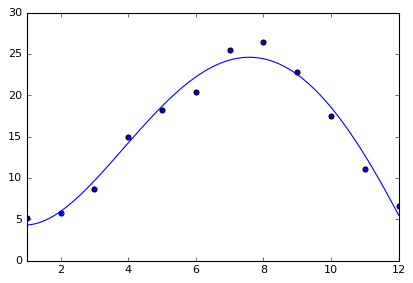

In [31]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim(1,12)
subplot.scatter(range(1,13), train_t)
linex = np.linspace(1,12,100)
liney = predict(linex)
subplot.plot(linex,liney)